# Homework 2: Regresión en Machine Learning

## Solución a las preguntas del homework

En esta notebook se encuentran las respuestas a las preguntas del homework 2 del Machine Learning Zoomcamp 2025.

### Datos utilizados
Para este homework utilizaremos el dataset de automóviles que contiene información sobre diferentes características de vehículos.

In [194]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Librerías importadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Sklearn version: {sklearn.__version__}")

Librerías importadas correctamente
Pandas version: 2.3.3
NumPy version: 2.3.3
Sklearn version: 1.7.2


In [8]:
# Descargar el dataset de precios de automóviles
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-05 00:09:35--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.09s   

2025-10-05 00:09:36 (9.47 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [9]:
!mv car_fuel_efficiency.csv ./data

In [10]:
!ls data

car_fuel_efficiency.csv


### Cargar los datos

In [195]:
df_car = pd.read_csv('./data/car_fuel_efficiency.csv')
print(f"Forma del dataset: {df_car.shape}")

Forma del dataset: (9704, 11)


In [196]:
print(f"Columnas disponibles: {df_car.columns.tolist()}")

Columnas disponibles: ['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain', 'num_doors', 'fuel_efficiency_mpg']


In [197]:
print(f"Primeras 5 filas:")
df_car.head()

Primeras 5 filas:


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [198]:
df_car = df_car[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df_car.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## Exploración de Datos (EDA)

Vamos a explorar el dataset para entender las características de los datos.


In [199]:
# Información básica del dataset
print("INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 50)
print(f"Número de registros: {len(df_car):,}")
print(f"Número de características: {df_car.shape[1]}")
print(f"Memoria utilizada: {df_car.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nTIPOS DE DATOS")
print("=" * 30)
print(df_car.dtypes.value_counts())

INFORMACIÓN BÁSICA DEL DATASET
Número de registros: 9,704
Número de características: 5
Memoria utilizada: 0.37 MB

TIPOS DE DATOS
float64    3
int64      2
Name: count, dtype: int64


## Q1. Columna con valores faltante

**Pregunta:** Hay una columna con valores faltantes. ¿Cuál es?

**Respuesta:**

In [200]:
print("\nVALORES FALTANTES")
print("=" * 25)
missing_values = df_car.isnull().sum()
missing_pct = (missing_values / len(df_car)) * 100
missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje': missing_pct
}).sort_values('Valores Faltantes', ascending=False)
print(missing_df[missing_df['Valores Faltantes'] > 0])


VALORES FALTANTES
            Valores Faltantes  Porcentaje
horsepower                708     7.29596


## Q2. Mediana de 'horsepower'

**Pregunta:** ¿Cuál es la mediana (percentil 50%) de la variable 'horsepower'?

**Respuesta:**

In [201]:
df_car['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [202]:
median_horsepower = df_car['horsepower'].median()
median_horsepower

np.float64(149.0)

In [203]:
p50_horsepower = df_car['horsepower'].quantile(0.5)
p50_horsepower

np.float64(149.0)

In [204]:
print("Percentil 50% (mediana):", p50_horsepower)

Percentil 50% (mediana): 149.0


In [205]:
# Análisis de la variable objetivo (fuel_efficiency_mpg)
print("ANÁLISIS DE LA VARIABLE OBJETIVO (fuel_efficiency_mpg)")
print("=" * 50)

fuel_efficiency_mpg_stats = df_car['fuel_efficiency_mpg'].describe()
print(f"Promedio de la Distribución de la Eficiencia: {fuel_efficiency_mpg_stats['mean']:,.2f}")
print(f"Mediana de la Distribución de la Eficiencia: {fuel_efficiency_mpg_stats['50%']:,.2f}")
print(f"Mínimo de la Distribución de la Eficiencia: {fuel_efficiency_mpg_stats['min']:,.2f}")
print(f"Máximo de la Distribución de la Eficiencia: {fuel_efficiency_mpg_stats['max']:,.2f}")
print(f"Desviación estándar: {fuel_efficiency_mpg_stats['std']:,.2f}")

ANÁLISIS DE LA VARIABLE OBJETIVO (fuel_efficiency_mpg)
Promedio de la Distribución de la Eficiencia: 14.99
Mediana de la Distribución de la Eficiencia: 15.01
Mínimo de la Distribución de la Eficiencia: 6.20
Máximo de la Distribución de la Eficiencia: 25.97
Desviación estándar: 2.56


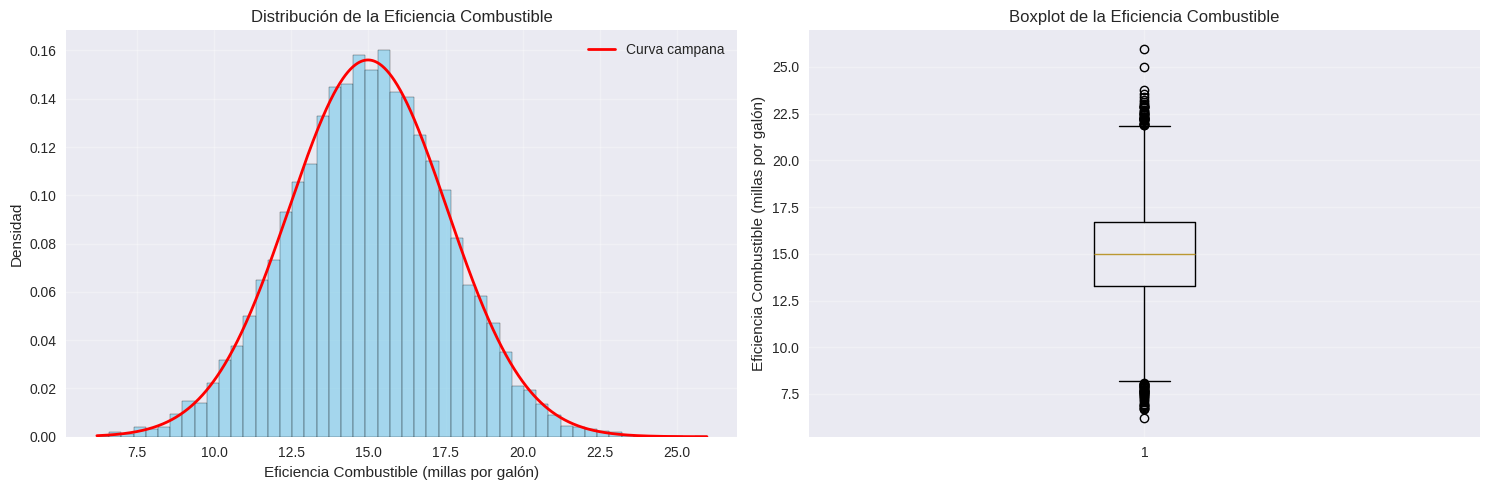

In [345]:
# Datos
data = df_car['fuel_efficiency_mpg'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma con curva tipo campana
axes[0].hist(data, bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
# Curva de densidad normal aproximada
media = np.mean(data)
std = np.std(data)
x = np.linspace(data.min(), data.max(), 1000)
y = norm.pdf(x, media, std)
axes[0].plot(x, y, color='red', lw=2, label='Curva campana')
axes[0].set_title('Distribución de la Eficiencia Combustible')
axes[0].set_xlabel('Eficiencia Combustible (millas por galón)')
axes[0].set_ylabel('Densidad')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(data)
axes[1].set_title('Boxplot de la Eficiencia Combustible')
axes[1].set_ylabel('Eficiencia Combustible (millas por galón)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**engine_displacement**

In [324]:
df_car['engine_displacement'].describe()

count    9704.000000
mean      199.708368
std        49.455319
min        10.000000
25%       170.000000
50%       200.000000
75%       230.000000
max       380.000000
Name: engine_displacement, dtype: float64

In [328]:
df_car['engine_displacement'].value_counts().reset_index(name='count').rename(columns={'index': 'engine_displacement'})

,engine_displacement,count
0,190,816
1,200,805
2,210,770
3,220,729
4,180,719
5,170,662
6,230,617
7,160,559
8,240,550
9,250,463


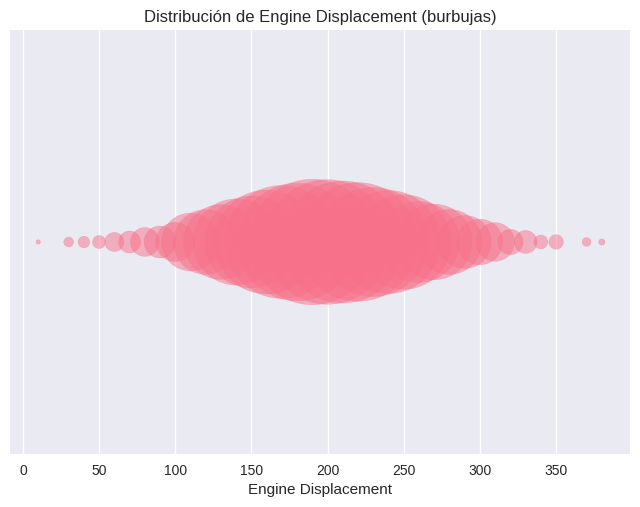

In [329]:
counts = df_car['engine_displacement'].value_counts().sort_index()

# Gráfico de burbujas
plt.scatter(
    counts.index, 
    [1]*len(counts),                 # todos en la misma fila (para simular burbujas)
    s=counts.values*10,              # tamaño proporcional a la frecuencia
    alpha=0.5
)

plt.yticks([])  # ocultar eje Y
plt.xlabel("Engine Displacement")
plt.title("Distribución de Engine Displacement (burbujas)")
plt.show()

**vehicle_weight**

In [330]:
df_car['vehicle_weight'].describe()

count    9704.000000
mean     3001.280993
std       497.894860
min       952.681761
25%      2666.248985
50%      2993.226296
75%      3334.957039
max      4739.077089
Name: vehicle_weight, dtype: float64

In [331]:
df_car['vehicle_weight'].value_counts().reset_index(name='count').rename(columns={'index': 'vehicle_weight'})

,vehicle_weight,count
0,3413.433759,1
1,3149.664934,1
2,3079.038997,1
3,2542.392402,1
4,3460.870990,1
...,...,...
9699,2981.107371,1
9700,2439.525729,1
9701,2583.471318,1
9702,2905.527390,1


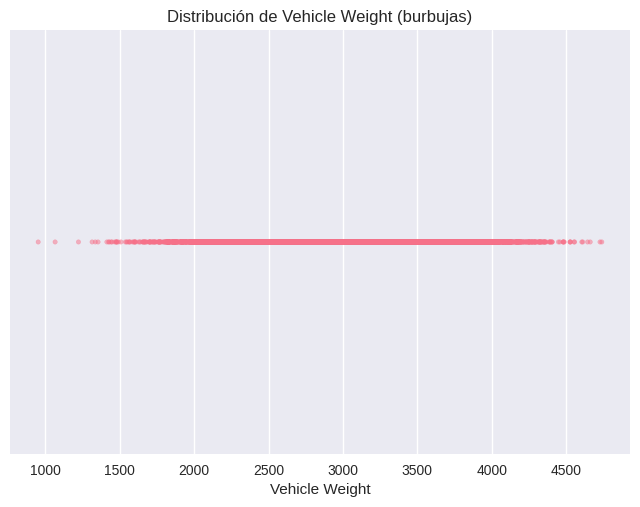

In [332]:
counts = df_car['vehicle_weight'].value_counts().sort_index()

# Gráfico de burbujas
plt.scatter(
    counts.index, 
    [1]*len(counts),                 # todos en la misma fila (para simular burbujas)
    s=counts.values*10,              # tamaño proporcional a la frecuencia
    alpha=0.5
)

plt.yticks([])  # ocultar eje Y
plt.xlabel("Vehicle Weight")
plt.title("Distribución de Vehicle Weight (burbujas)")
plt.show()

**model_year**

In [333]:
df_car['model_year'].describe()

count    9704.000000
mean     2011.484027
std         6.659808
min      2000.000000
25%      2006.000000
50%      2012.000000
75%      2017.000000
max      2023.000000
Name: model_year, dtype: float64

In [334]:
df_car['model_year'].value_counts().reset_index(name='count').rename(columns={'index': 'model_year'})

,model_year,count
0,2003,447
1,2002,446
2,2018,443
3,2004,440
4,2021,438
5,2015,435
6,2006,431
7,2010,428
8,2014,427
9,2005,427


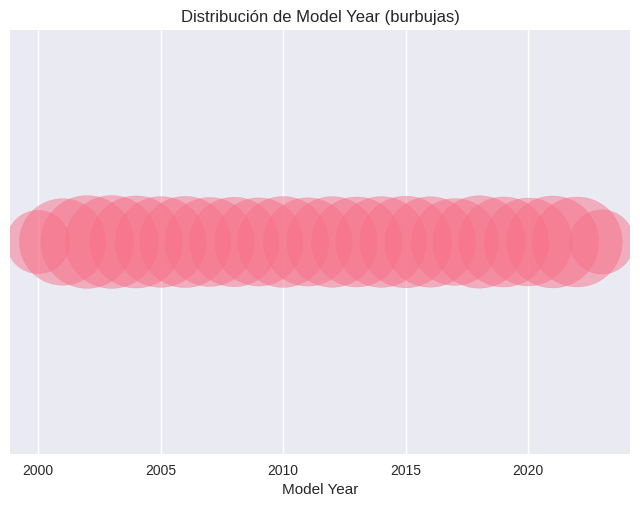

In [335]:
counts = df_car['model_year'].value_counts().sort_index()

# Gráfico de burbujas
plt.scatter(
    counts.index, 
    [1]*len(counts),                 # todos en la misma fila (para simular burbujas)
    s=counts.values*10,              # tamaño proporcional a la frecuencia
    alpha=0.5
)

plt.yticks([])  # ocultar eje Y
plt.xlabel("Model Year")
plt.title("Distribución de Model Year (burbujas)")
plt.show()

**horsepower**

In [337]:
df_car['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [338]:
df_car['horsepower'].value_counts().reset_index(name='count').rename(columns={'index': 'horsepower'})

,horsepower,count
0,152.0,142
1,145.0,141
2,151.0,134
3,148.0,130
4,141.0,130
...,...,...
187,40.0,1
188,57.0,1
189,245.0,1
190,252.0,1


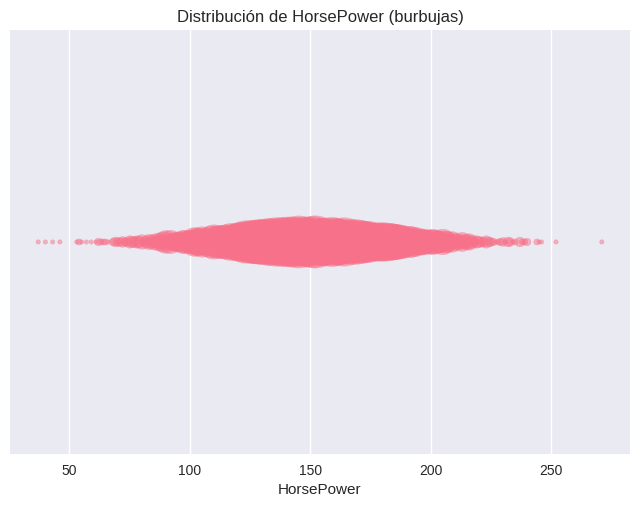

In [339]:
counts = df_car['horsepower'].value_counts().sort_index()

# Gráfico de burbujas
plt.scatter(
    counts.index, 
    [1]*len(counts),                 # todos en la misma fila (para simular burbujas)
    s=counts.values*10,              # tamaño proporcional a la frecuencia
    alpha=0.5
)

plt.yticks([])  # ocultar eje Y
plt.xlabel("HorsePower")
plt.title("Distribución de HorsePower (burbujas)")
plt.show()

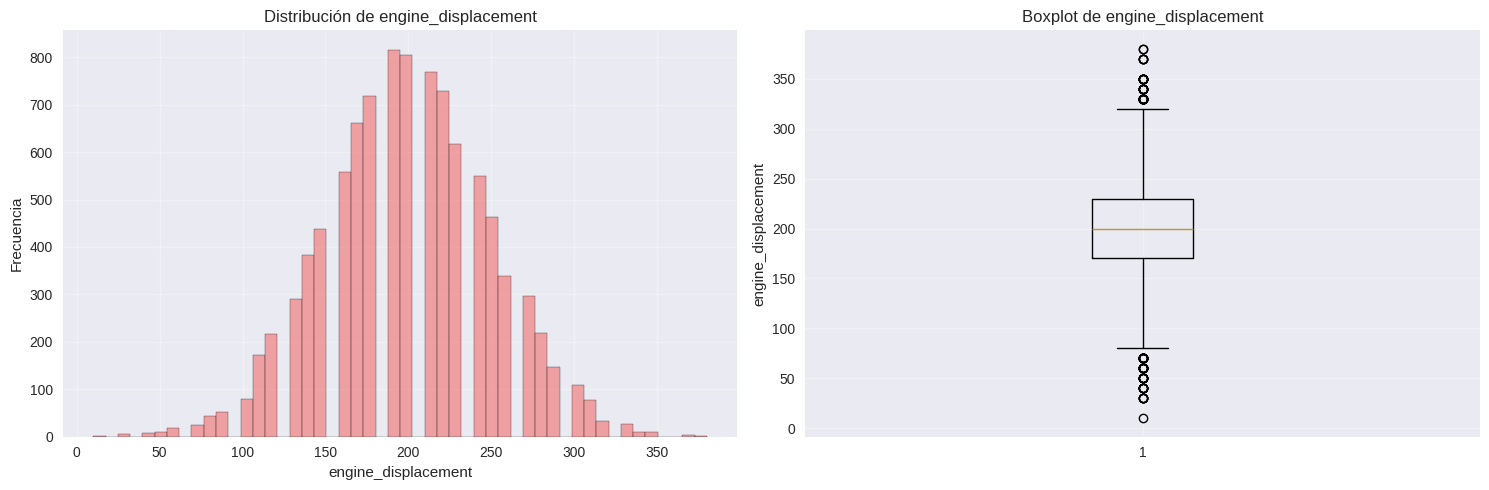

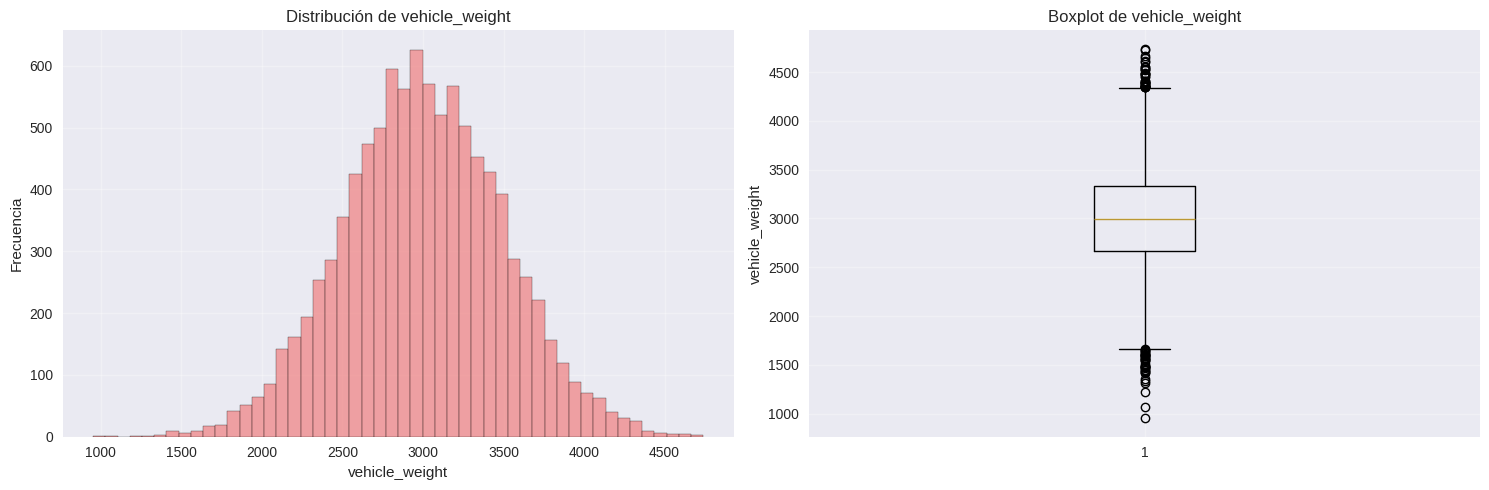

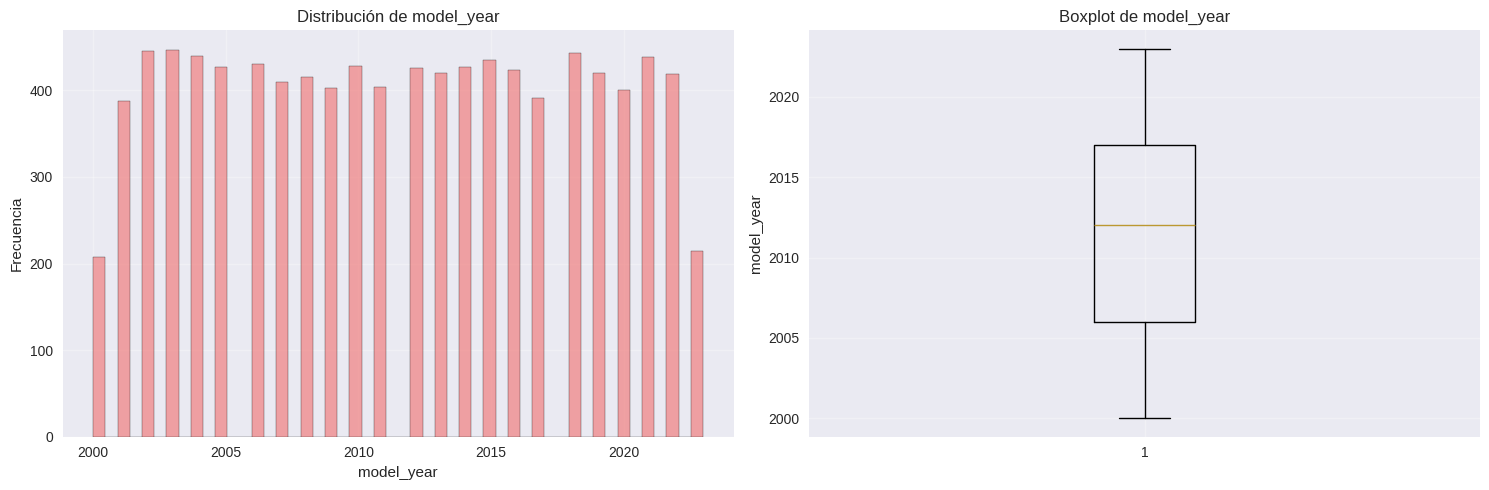

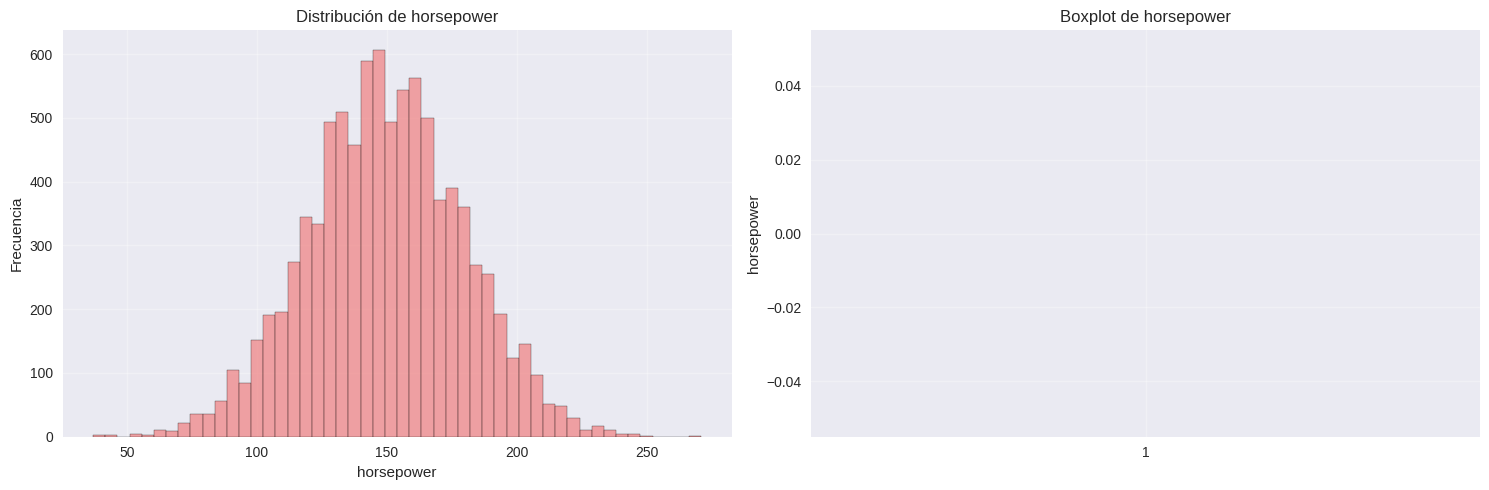

In [207]:
columns = ['engine_displacement', 'vehicle_weight', 'model_year', 'horsepower']

for col in columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histograma
    axes[0].hist(df_car[col], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0].set_title(f'Distribución de {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frecuencia')
    axes[0].grid(True, alpha=0.3)
    
    # Boxplot
    axes[1].boxplot(df_car[col])
    axes[1].set_title(f'Boxplot de {col}')
    axes[1].set_ylabel(col)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


**Preparar y dividir el conjunto de datos**

- Mezcle el conjunto de datos (el filtrado que creó anteriormente), use semilla 42.
- Divida sus datos en conjuntos de entrenamiento/validación/prueba, con una distribución de 60%/20%/20%.

In [208]:
n = len(df_car)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(f"Cantidad de registros: {n}")
print(f"Entrenamiento 60%: {n_train}")
print(f"Validación 20%: {n_val}")
print(f"Prueba 20%: {n_test}")

Cantidad de registros: 9704
Entrenamiento 60%: 5824
Validación 20%: 1940
Prueba 20%: 1940


In [209]:
indices = np.arange(n)
indices

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [210]:
np.random.seed(42)
np.random.shuffle(indices)
indices

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [211]:
df_train = df_car.iloc[indices[:n_train]]
df_val = df_car.iloc[indices[n_train:n_train+n_val]]
df_test = df_car.iloc[indices[n_train+n_val:]]

In [212]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [213]:
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419


In [214]:
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
3729,140,148.0,2704.826005,2017,15.804354
7764,210,136.0,3001.227490,2004,14.272374
4358,210,152.0,3747.467392,2021,11.748441
5922,190,128.0,2705.833636,2014,16.485991
1343,230,156.0,2505.939657,2005,17.779704


In [215]:
def split_data(df, por_val=0.2, por_test=0.2, seed=42):
    
    n = len(df)
    n_val = int(n * por_val)
    n_test = int(n * por_test)
    n_train = n - n_val - n_test
    
    indices = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(indices)

    train = df.iloc[indices[:n_train]]
    val = df.iloc[indices[n_train:n_train+n_val]]
    test = df.iloc[indices[n_train+n_val:]]

    return train, val, test

In [216]:
df_train, df_val, df_test = split_data(df_car)

In [217]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [218]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [219]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## Q3. Manejo de valores faltantes en Q1

**Pregunta:** Necesitamos abordar los valores faltantes en la columna identificada en Q1.  
Tenemos dos opciones: rellenar con 0 o con la media de esta variable (calculada solo con el conjunto de entrenamiento).  
Para cada opción, entrene un modelo de regresión lineal sin regularización y evalúe el RMSE en el conjunto de validación.  
Redondee los RMSE a 2 dígitos.

¿Cuál opción ofrece un mejor RMSE?

**Respuesta:**


In [220]:
train_mean_horsepower = df_train['horsepower'].mean()
train_mean_horsepower

np.float64(149.54476367006487)

In [221]:
list_column_nan = [
    {'horsepower_0' : {'horsepower': 0}},
    {'horsepower_mean' : {'horsepower': float(train_mean_horsepower)}}
]
list_column_nan

[{'horsepower_0': {'horsepower': 0}},
 {'horsepower_mean': {'horsepower': 149.54476367006487}}]

In [222]:
def fill_column_nan(df, dict_fill):
    X = df.fillna(dict_fill).values
    
    return X

In [223]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [238]:
def rmse(y, y_pred, n_round=2):
    return round(root_mean_squared_error(y, y_pred), n_round)

In [228]:
results = []

for item in list_column_nan:
    for key, value in item.items():
        print(f'Entrenando modelo usando {key}')
        
        print(f'Aplicando fillna segun clave:valor -> {value}')
        X_train = fill_column_nan(df_train, value)

        print('Entrenando modelo...')
        w0, W = train_linear_regression(X_train, y_train)

        print('Evaluando...')     
        y_pred = w0 + X_train.dot(W)
        rmse_train = rmse(y_train, y_pred)
        print(f'RMSE train {rmse_train}')

        X_val = fill_column_nan(df_val, value)
        y_pred = w0 + X_val.dot(W)
        rmse_val = rmse(y_val, y_pred)
        print(f'RMSE val {rmse_val}')

        print('...') 

        results.append({
            "estrategia_fillna": value,
            "rmse_train": rmse_train,
            "rmse_val": rmse_val
        })

Entrenando modelo usando horsepower_0
Aplicando fillna segun clave:valor -> {'horsepower': 0}
Entrenando modelo...
Evaluando...
RMSE train 0.52
RMSE val 0.52
...
Entrenando modelo usando horsepower_mean
Aplicando fillna segun clave:valor -> {'horsepower': 149.54476367006487}
Entrenando modelo...
Evaluando...
RMSE train 0.46
RMSE val 0.46
...


In [229]:
df_results = pd.DataFrame(results)
df_results

,estrategia_fillna,rmse_train,rmse_val
0,{'horsepower': 0},0.52,0.52
1,{'horsepower': 149.54476367006487},0.46,0.46


In [230]:
df_train['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5824 entries, 0 to 5823
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
5395 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


In [231]:
X_train_mean = fill_column_nan(df_train, {'horsepower': 149.54476367006487})
X_train_0 = fill_column_nan(df_train, {'horsepower': 0})

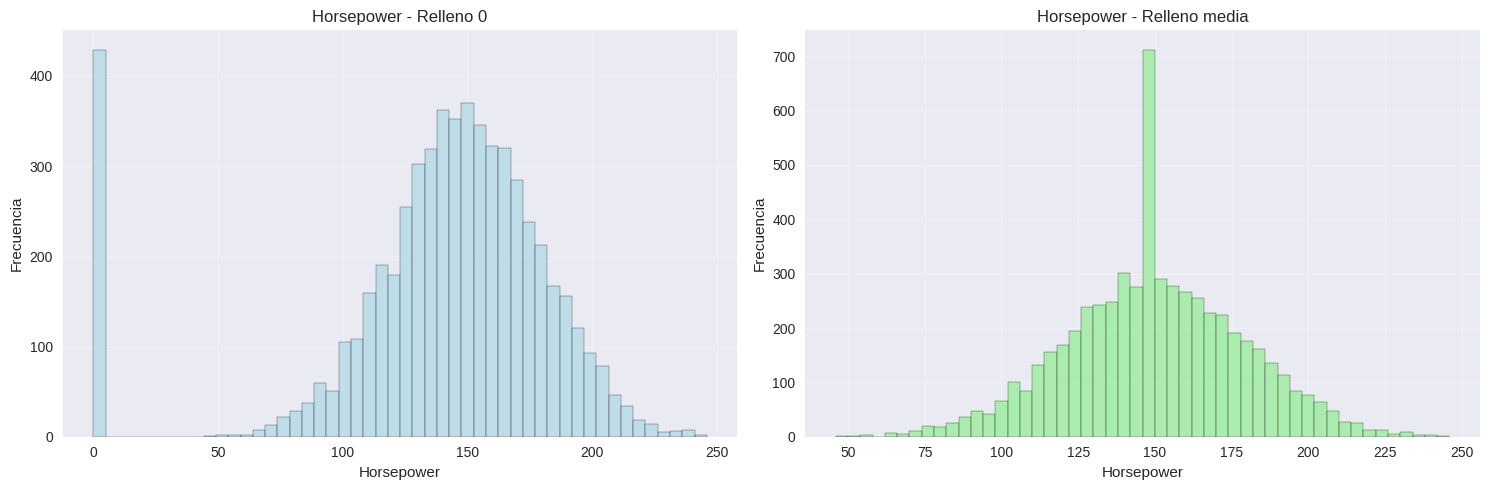

In [245]:
ig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma para relleno 0
axes[0].hist(X_train_0[:, 1], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].set_title('Horsepower - Relleno 0')
axes[0].set_xlabel('Horsepower')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

# Histograma para relleno con media
axes[1].hist(X_train_mean[:, 1], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Horsepower - Relleno media')
axes[1].set_xlabel('Horsepower')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Q4. Regresión lineal regularizada

**Pregunta:** Entrenar una regresión lineal regularizada con `r` en `[0, 0.01, 0.1, 1, 5, 10, 100]`.
¿Cuál valor de `r` da el mejor RMSE en validación? (si hay empate, elegir el menor `r`).

**Respuesta:**


In [233]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [237]:
list_r = [0, 0.01, 0.1, 1, 5, 10, 100]
list_r

[0, 0.01, 0.1, 1, 5, 10, 100]

In [242]:
results_r = []

for r in list_r:
    print(f'Entrenando modelo usando regularizacio r:{r}')
    
    print('Aplicando fillna con valor 0...')
    X_train = fill_column_nan(df_train, {'horsepower': 0})

    print('Entrenando modelo...')
    w0, W = train_linear_regression_reg(X_train, y_train, r)
    
    print('Evaluando...')     
    y_pred = w0 + X_train.dot(W)
    rmse_train = rmse(y_train, y_pred, 2)
    print(f'RMSE train {rmse_train}')

    X_val = fill_column_nan(df_val, {'horsepower': 0})
    y_pred = w0 + X_val.dot(W)
    rmse_val = rmse(y_val, y_pred, 2)
    print(f'RMSE val {rmse_val}')

    print('...') 

    results_r.append({
        "r": r,
        "rmse_train": rmse_train,
        "rmse_val": rmse_val
    })

Entrenando modelo usando regularizacio r:0
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.52
RMSE val 0.52
...
Entrenando modelo usando regularizacio r:0.01
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.52
RMSE val 0.52
...
Entrenando modelo usando regularizacio r:0.1
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.52
RMSE val 0.52
...
Entrenando modelo usando regularizacio r:1
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.53
RMSE val 0.52
...
Entrenando modelo usando regularizacio r:5
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.53
RMSE val 0.52
...
Entrenando modelo usando regularizacio r:10
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.53
RMSE val 0.52
...
Entrenando modelo usando regularizacio r:100
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.53
RMSE val 

In [243]:
df_results_r = pd.DataFrame(results_r)
df_results_r

,r,rmse_train,rmse_val
0,0.00,0.52,0.52
1,0.01,0.52,0.52
2,0.10,0.52,0.52
3,1.00,0.53,0.52
4,5.00,0.53,0.52
5,10.00,0.53,0.52
6,100.00,0.53,0.52


## Q5. Influencia de la semilla

**Pregunta:** ¿Cuál es la desviación estándar del RMSE en el conjunto de validación al variar la semilla de [0–9], usando imputación con 0 y regresión lineal sin regularización?

**Respuesta:**

In [282]:
def rmse_v2(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [283]:
def split_data_v2(df, target_col='fuel_efficiency_mpg', val_size=0.2, test_size=0.2, seed=42):
    
    n = len(df)
    n_val = int(n * val_size)
    n_test = int(n * test_size)
    n_train = n - n_val - n_test
    
    indices = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(indices)

    idx_train = indices[:n_train]
    idx_val = indices[n_train:n_train+n_val]
    idx_test = indices[n_train+n_val:]

    def split(idx):
        df_split = df.iloc[idx].reset_index(drop=True)
        y = df_split[target_col].values
        df_X = df_split.drop(columns=[target_col])
        return df_X, y

    df_train, y_train = split(idx_train)
    df_val, y_val = split(idx_val)
    df_test, y_test = split(idx_test)
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [284]:
list_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
list_seeds

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [285]:
results_seed = []

for seed in list_seeds:
    df_train, df_val, df_test, y_train, y_val, y_test = split_data_v2(df_car, seed=seed)
    
    print('Aplicando fillna con valor 0...')
    X_train = fill_column_nan(df_train, {'horsepower': 0})

    print('Entrenando modelo...')
    w0, W = train_linear_regression(X_train, y_train)
    
    print('Evaluando...')     
    y_pred = w0 + X_train.dot(W)
    rmse_train = rmse_v2(y_train, y_pred)
    print(f'RMSE train {rmse_train}')

    X_val = fill_column_nan(df_val, {'horsepower': 0})
    y_pred = w0 + X_val.dot(W)
    rmse_val = rmse_v2(y_val, y_pred)
    print(f'RMSE val {rmse_val}')

    print('...') 

    results_seed.append({
        "seed": seed,
        "rmse_train": rmse_train,
        "rmse_val": rmse_val
    })

Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.5171560913636251
RMSE val 0.5206531296294218
...
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.5148529296311273
RMSE val 0.521338891285577
...
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.520558311480986
RMSE val 0.5228069974803171
...
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.5198664820191077
RMSE val 0.515951674119676
...
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.5171675510792179
RMSE val 0.5109129460053851
...
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.5195177528194667
RMSE val 0.52834064601107
...
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.5124114964022372
RMSE val 0.5313910658146311
...
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train 0.524763629954572
RMSE val 0.509

In [286]:
df_results_seed = pd.DataFrame(results_seed)
df_results_seed

,seed,rmse_train,rmse_val
0,0,0.517156,0.520653
1,1,0.514853,0.521339
2,2,0.520558,0.522807
3,3,0.519866,0.515952
4,4,0.517168,0.510913
5,5,0.519518,0.528341
6,6,0.512411,0.531391
7,7,0.524764,0.509067
8,8,0.524306,0.514740
9,9,0.521971,0.513187


In [315]:
df_results_seed['rmse_val'].values

array([0.52065313, 0.52133889, 0.522807  , 0.51595167, 0.51091295,
       0.52834065, 0.53139107, 0.50906704, 0.51473991, 0.51318659])

In [313]:
rmse_val = df_results_seed['rmse_val'].values
std_rmse_val = np.std(rmse_val)
round(std_rmse_val, 3)

np.float64(0.007)

In [290]:
np.std([diccionario.get('rmse_val') for diccionario in results_seed])

np.float64(0.006989446426433706)

## Q6. RMSE con r=0.001

**Pregunta:**
Dividimos el dataset como antes, usando `seed=9`. Luego combinamos los conjuntos de train y validation, rellenamos los valores faltantes con 0 y entrenamos un modelo con `r=0.001`. ¿Cuál es el RMSE en el conjunto de test?

**Respuesta:**

In [293]:
df_train, df_val, df_test, y_train, y_val, y_test = split_data_v2(df_car, seed=9)

In [304]:
list_r2 = [0.001]

In [306]:
results_r2 = []

for r in list_r2:
    print(f'Entrenando modelo usando regularizacio r:{r}')

    df_train_val = pd.concat([df_train, df_val], axis=0)
    y_train_val = np.concatenate((y_train, y_val), axis=0)
    
    print('Aplicando fillna con valor 0...')
    X_train_val = fill_column_nan(df_train_val, {'horsepower': 0})

    print('Entrenando modelo...')
    w0, W = train_linear_regression_reg(X_train_val, y_train_val, r)
    
    print('Evaluando...')     
    y_pred = w0 + X_train_val.dot(W)
    rmse_train_val = rmse_v2(y_train_val, y_pred)
    print(f'RMSE train_val {rmse_train_val}')

    X_test = fill_column_nan(df_test, {'horsepower': 0})
    y_pred = w0 + X_test.dot(W)
    rmse_test = rmse_v2(y_test, y_pred)
    print(f'RMSE test {rmse_test}')

    print('...') 

    results_r2.append({
        "r": r,
        "rmse_train_val": rmse_train_val,
        "rmse_test": rmse_test
    })

Entrenando modelo usando regularizacio r:0.001
Aplicando fillna con valor 0...
Entrenando modelo...
Evaluando...
RMSE train_val 0.5197448026201177
RMSE test 0.5156261299169602
...


In [307]:
df_results_r2 = pd.DataFrame(results_r2)
df_results_r2

,r,rmse_train_val,rmse_test
0,0.001,0.519745,0.515626


In [316]:
# Seleccionar características numéricas relevantes para regresión
numerical_features = ['year', 'mileage', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical_features = ['make', 'model', 'transmission_type', 'vehicle_style', 'driven_wheels']

print("🔢 CARACTERÍSTICAS NUMÉRICAS SELECCIONADAS:")
print("=" * 45)
for feature in numerical_features:
    if feature in df_car.columns:
        print(f"✅ {feature}")
    else:
        print(f"❌ {feature} - No encontrada")

print("\n📝 CARACTERÍSTICAS CATEGÓRICAS:")
print("=" * 35)
for feature in categorical_features:
    if feature in df_car.columns:
        print(f"✅ {feature}")
    else:
        print(f"❌ {feature} - No encontrada")

# Verificar valores únicos en características categóricas
print("\n🔍 VALORES ÚNICOS EN CARACTERÍSTICAS CATEGÓRICAS:")
print("=" * 55)
for feature in categorical_features:
    if feature in df_car.columns:
        unique_count = df[feature].nunique()
        print(f"{feature}: {unique_count} valores únicos")
        if unique_count <= 10:
            print(f"  Valores: {df[feature].unique()}")
        print()


🔢 CARACTERÍSTICAS NUMÉRICAS SELECCIONADAS:
❌ year - No encontrada
❌ mileage - No encontrada
❌ engine_hp - No encontrada
❌ engine_cylinders - No encontrada
❌ highway_mpg - No encontrada
❌ city_mpg - No encontrada

📝 CARACTERÍSTICAS CATEGÓRICAS:
❌ make - No encontrada
❌ model - No encontrada
❌ transmission_type - No encontrada
❌ vehicle_style - No encontrada
❌ driven_wheels - No encontrada

🔍 VALORES ÚNICOS EN CARACTERÍSTICAS CATEGÓRICAS:


## 🤖 Entrenamiento de Modelos de Regresión

Ahora vamos a entrenar diferentes modelos de regresión y comparar su rendimiento.


In [ ]:
# Preparar datos para entrenamiento
print("🎯 PREPARANDO DATOS PARA ENTRENAMIENTO")
print("=" * 40)

# Seleccionar características y variable objetivo
X = df_clean.drop(columns=['price'])
y = df_clean['price']

print(f"📊 Características (X): {X.shape}")
print(f"🎯 Variable objetivo (y): {y.shape}")

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n📈 Conjunto de entrenamiento: {X_train.shape}")
print(f"📊 Conjunto de prueba: {X_test.shape}")

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Datos normalizados para entrenamiento")
